In [1]:
#At the beginning of my work I uploaded different libraries, which I'll need for my work:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns




from matplotlib import cm
from sklearn.preprocessing import MinMaxScaler  
from sklearn.model_selection import train_test_split

#accuracy metrics
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import classification_report

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc, roc_auc_score

#Eploration a data visualisation of data. 

In [2]:
#Uplaoding data, data scaling
red=pd.read_csv('winequality_red.csv',sep=";",header=0)
red.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [3]:
red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
red.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [5]:
red.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [6]:
red['qua']=red['quality'].apply(lambda x: 1 if (x==8 or x==7) else 0)
Zero, One =red['qua'].value_counts()

good quality wine: 217
bad quality wine: 1382


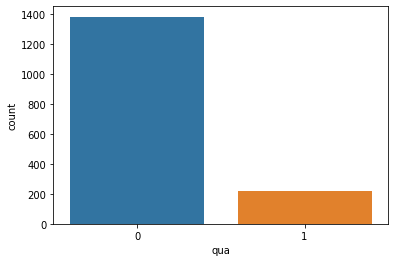

In [7]:
sns.countplot(red['qua'], label="Count")
print('good quality wine:', One)
print('bad quality wine:', Zero)

c:\python37\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
c:\python37\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


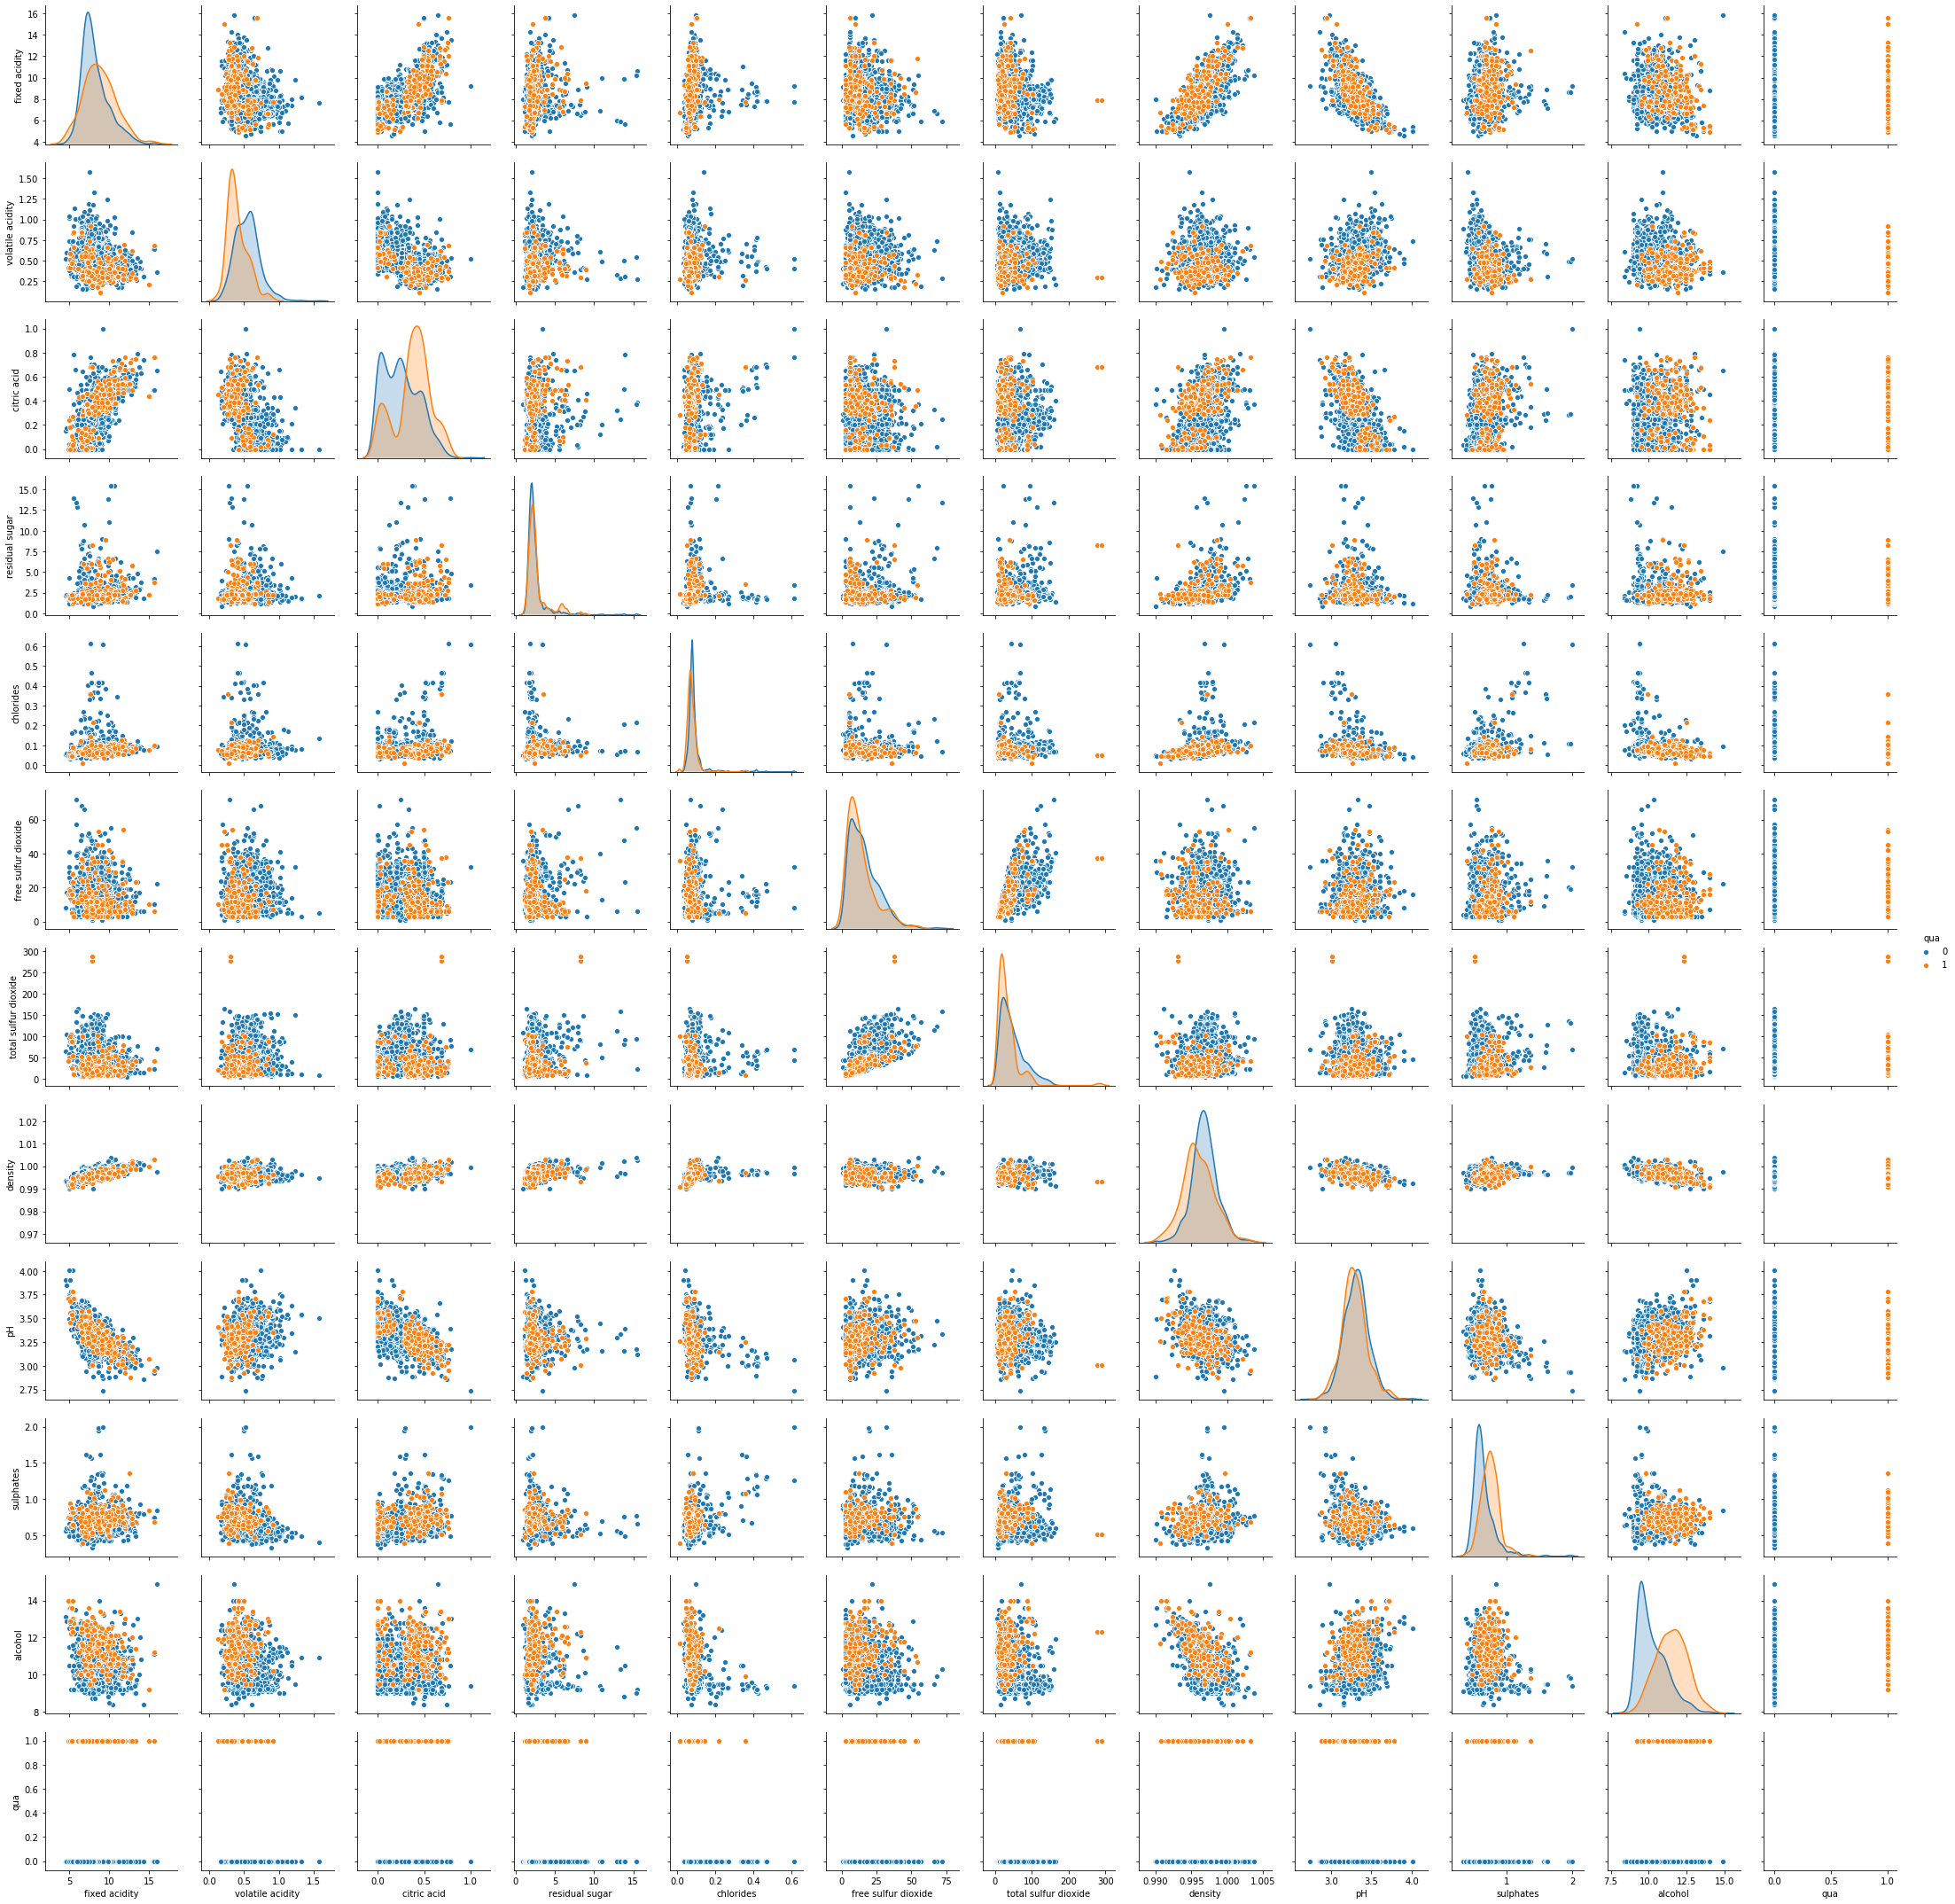

In [8]:
#Data exploration
red1=red.drop('quality',axis=1)
sns.pairplot(red1, hue= 'qua')

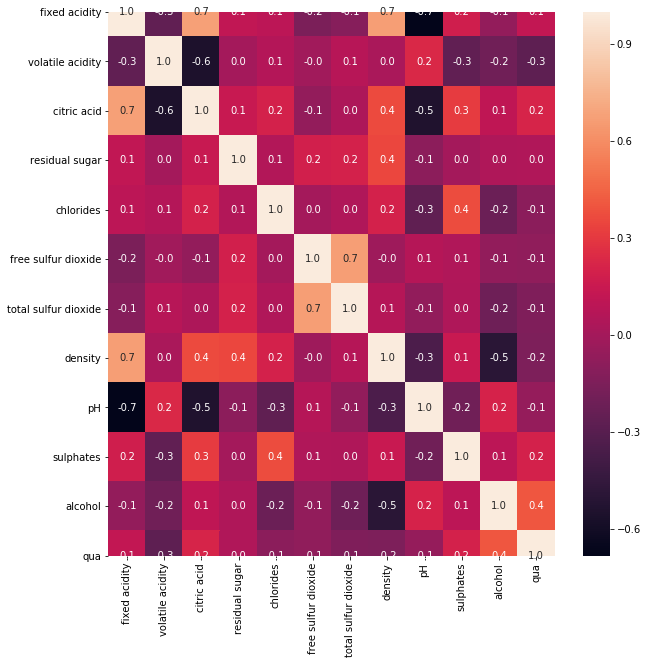

In [9]:
f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(red1.corr(),annot=True, fmt= '.1f')

In [10]:
#Scaling of data and trin test split
list2=['quality','qua']
X=red.drop(list2,axis=1)
y=red['qua']

X_train, X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

#standartization for model training
scaler=MinMaxScaler().fit(X_train)
X_train_n=scaler.transform(X_train)
X_test_n=scaler.transform(X_test)


X_n=((X-X.mean())/(X.std()))    #standartization wole data set for visualization

In [11]:
data=pd.concat([y,X_n],axis=1)
data=pd.melt(data,id_vars='qua', var_name='variables',value_name="value")

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text xticklabel objects>)

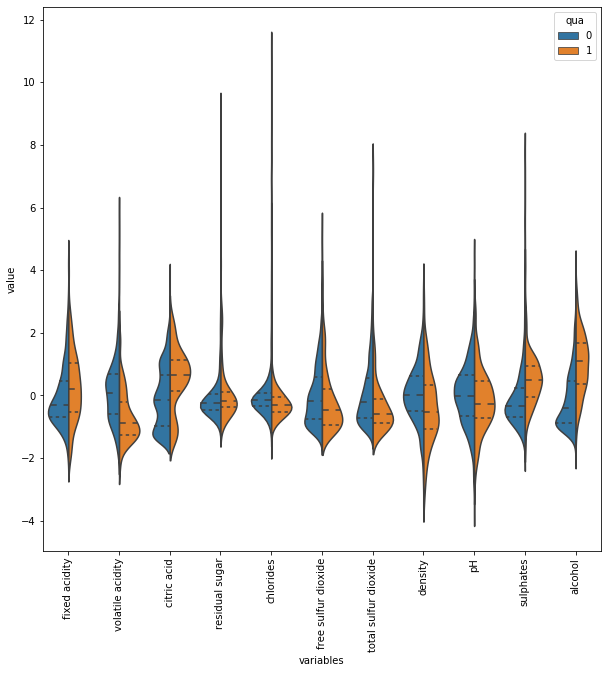

In [12]:
plt.figure(figsize=(10,10))
sns.violinplot(x="variables", y="value", hue="qua", data=data,split=True, inner="quart")
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text xticklabel objects>)

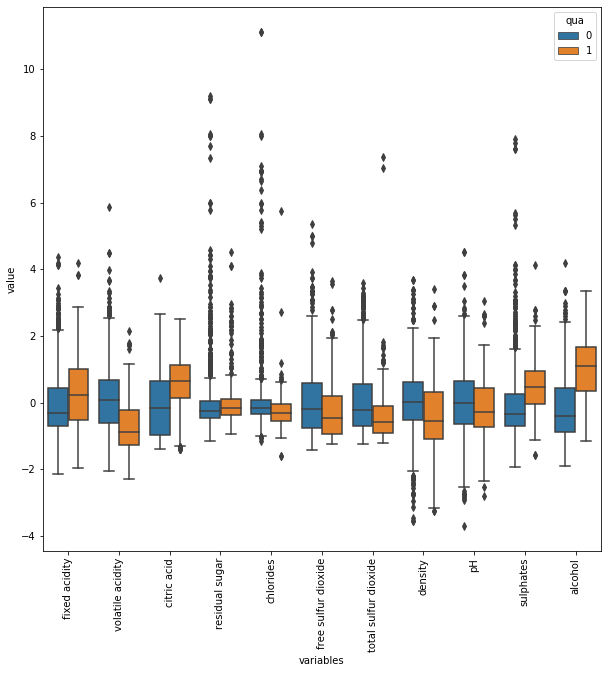

In [13]:
plt.figure(figsize=(10,10))
sns.boxplot(x="variables", y="value", hue="qua", data=data)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text xticklabel objects>)

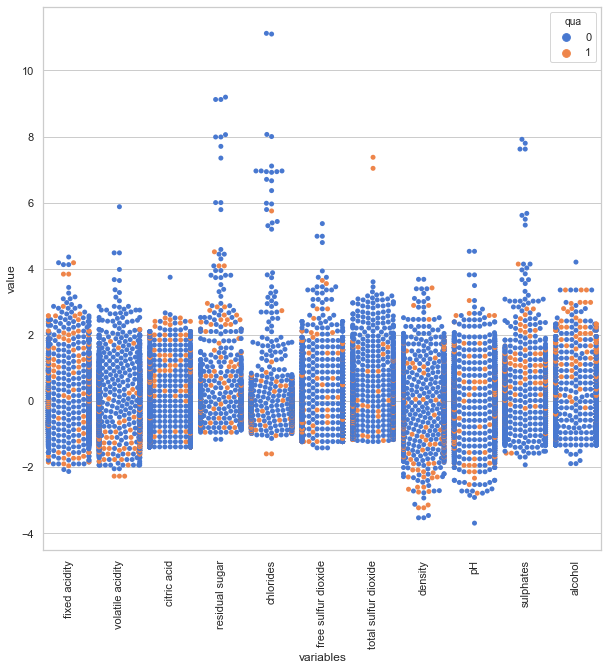

In [14]:
sns.set(style="whitegrid", palette="muted")
plt.figure(figsize=(10,10))
#tic = time.time()
sns.swarmplot(x="variables", y="value", hue="qua", data=data)

plt.xticks(rotation=90)

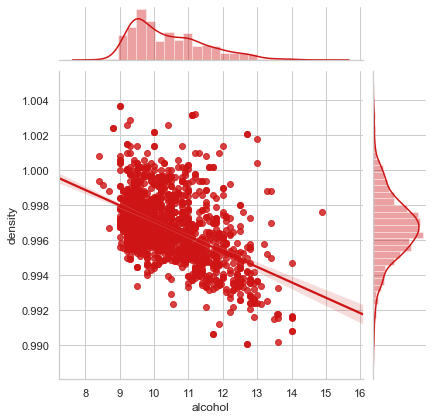

In [15]:
sns.jointplot(red.loc[:,'alcohol'], red.loc[:,'density'], kind="regg", color="#ce1414")

In [23]:
#Import libraries for models
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier 
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from sklearn.metrics import confusion_matrix

In [17]:
models=[]

#training my models
models.append(('Cl_dummy', DummyClassifier(strategy='most_frequent').fit(X_train,y_train)))             #dummy classifier
models.append(('Cl', LogisticRegression(random_state=0,solver='lbfgs').fit(X_train_n,y_train)))          #logistic regresion 
models.append(('SVM', SVC(kernel='rbf', gamma=1, probability=True).fit(X_train,y_train)))                 #Suport vector machine classifier
models.append(('Tree', tree.DecisionTreeClassifier(max_depth=3,random_state=0).fit(X_train, y_train)))    #Decision Tree
models.append(('RF',RandomForestClassifier(random_state=0).fit(X_train,y_train)))                        #Random Forest 
models.append(('BF',GradientBoostingClassifier(random_state=0).fit(X_train,y_train)))                   #Boosted Decision tree
models.append(('NN',MLPClassifier(hidden_layer_sizes=[50,50],solver='lbfgs',random_state=0).fit(X_train_n, y_train)))  #Neural Networks Classifier
models.append(('NB',GaussianNB().fit(X_train_n, y_train)))                                             #Naive Bayes
models.append(('KNN',KNeighborsClassifier(n_neighbors=3).fit(X_train,y_train)))                      #K_nearest Neighbors classifier


c:\python37\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [18]:
y_pred=[]
y_proba=[]
names=[]
score=[]
f1score=[]
#pre_recall=[]
#auc=[]


for name,model in models: 
    if name in ['CL','NN','NB']:
        y_pred.append(model.predict(X_test_n))
        y_proba.append(model.predict_proba(X_test_n))
        score.append(accuracy_score(y_test,model.predict(X_test_n)))
        f1score.append(f1_score(y_test,model.predict(X_test_n)))
       # pre_recall.append(precision_recall_curve(y_test, model.predict_proba(X_test_n)[:, 1]))
    else:
        y_pred.append(model.predict(X_test))
        y_proba.append(model.predict_proba(X_test))
        score.append(accuracy_score(y_test,model.predict(X_test)))
        f1score.append(f1_score(y_test,model.predict(X_test)))
        #pre_recall.append(precision_recall_curve(y_test, model.predict_proba(X_test)[:, 1]))
    names.append(name)

c:\python37\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [19]:
pd.DataFrame({'accurancy':score,'f1_score':f1score},index=names)

,accurancy,f1_score
Cl_dummy,0.895833,0.000000
Cl,0.579167,0.234848
SVM,0.922917,0.412698
Tree,0.864583,0.380952
RF,0.908333,0.551020
BF,0.904167,0.549020
NN,0.881250,0.521008
NB,0.814583,0.440252
KNN,0.870833,0.326087


In [25]:
RF=RandomForestClassifier(random_state=0).fit(X_train,y_train)
y_pred_RF=RF.predict(X_test)
cm_1 = confusion_matrix(y_test,y_pred_RF)
print(cm_1)

[[409  21]
 [ 23  27]]


c:\python37\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [20]:
#Uninvariate feature selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2


select_feature = SelectKBest(chi2, k=8).fit(X_train, y_train)

pd.Series(select_feature.scores_,index=X_train.columns)


fixed acidity             6.257184
volatile acidity          6.943595
citric acid               8.477008
residual sugar            1.246101
chlorides                 0.285962
free sulfur dioxide      67.411582
total sulfur dioxide    606.951619
density                   0.000103
pH                        0.019360
sulphates                 2.133160
alcohol                  21.172883
dtype: float64

In [21]:
red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,qua
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


In [33]:
# I will try to create model only with less features:
list3=['chlorides','density','pH','sulphates','residual sugar','quality','qua']
X2=red.drop(list3,axis=1)
y2=red['qua']

X2_train, X2_test,y2_train,y2_test=train_test_split(X2,y2,test_size=0.3,random_state=0)

RF_clf2=RandomForestClassifier(random_state=0).fit(X2_train,y2_train)
y2_pred_RF=RF_clf2.predict(X2_test)

score_2=accuracy_score(y2_test,y2_pred_RF)
f1_score_2=f1_score(y2_test,y2_pred_RF)
cm_2 = confusion_matrix(y2_test,y2_pred_RF)

print(cm_2)

pd.DataFrame({'accurancy':score_2,'f1_score':f1_score_2},index=['RF'])


[[418  12]
 [ 25  25]]


c:\python37\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


,accurancy,f1_score
RF,0.922917,0.574713


In [ ]:
#results of the model
#I am using scuved data for that reson my results is shown on precision recall curve where is measured AUC
